In [1]:
import pandas as pd
import numpy as np
import openpyxl
import pandas as pd
from datetime import date

import bt

import matplotlib.pyplot as plt
from ffn import *
from importlib import reload
pd.options.display.float_format = '{:.8f}'.format

In [2]:
# Disable scientific notation globally in matplotlib
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['axes.formatter.use_locale'] = False
plt.rcParams['axes.formatter.use_mathtext'] = False

In [3]:
np.set_printoptions(suppress=True, precision=8)

In [4]:
df_map = pd.read_excel("Raw_data.xlsx", sheet_name='mapping')

In [5]:
df_price = pd.read_excel("Raw_data.xlsx", sheet_name='Price')
df_mktcap = pd.read_excel("Raw_data.xlsx", sheet_name='CUR_MKT_CAP')


In [6]:
df_long = df_price.melt(id_vars=['Dates'],  # 'Dates' column remains as is
                        var_name='Company',  # All other columns become 'Company'
                        value_name='Price')

In [7]:
df_long_mkt = df_mktcap.melt(id_vars=['Dates'],  # 'Dates' column remains as is
                        var_name='Company',  # All other columns become 'Company'
                        value_name='Mkt_Cap')

In [8]:
df_merged = pd.merge(df_long, df_long_mkt, on=['Dates', 'Company'], how='left')

In [9]:
df_merged.shape

(311752, 4)

In [10]:
df_merged.rename(columns={'Company': 'BB Symbol'}, inplace=True)

In [11]:
df_final = pd.merge(df_merged, df_map[['Stock Name', 'Sector', 'BB Symbol']], on='BB Symbol', how='left')

In [12]:
df_final.head()

,Dates,BB Symbol,Price,Mkt_Cap,Stock Name,Sector
0,2017-01-02,ARTO IN Equity,149.88000000,NaN,Aarti Industries Ltd.,Materials
1,2017-01-03,ARTO IN Equity,151.64000000,57763.47830000,Aarti Industries Ltd.,Materials
2,2017-01-04,ARTO IN Equity,150.47000000,57320.02820000,Aarti Industries Ltd.,Materials
3,2017-01-05,ARTO IN Equity,151.19000000,57595.13150000,Aarti Industries Ltd.,Materials
4,2017-01-06,ARTO IN Equity,150.85000000,57463.73890000,Aarti Industries Ltd.,Materials


In [13]:
df_final.dtypes

Dates         datetime64[ns]
BB Symbol             object
Price                float64
Mkt_Cap              float64
Stock Name            object
Sector                object
dtype: object

In [14]:
#df_final['Dates'] = pd.to_datetime(df_final['Dates'])

In [15]:
df_final.set_index('Dates',inplace=True)

In [16]:
df_final.head()

,BB Symbol,Price,Mkt_Cap,Stock Name,Sector
Dates,,,,,
2017-01-02,ARTO IN Equity,149.88000000,NaN,Aarti Industries Ltd.,Materials
2017-01-03,ARTO IN Equity,151.64000000,57763.47830000,Aarti Industries Ltd.,Materials
2017-01-04,ARTO IN Equity,150.47000000,57320.02820000,Aarti Industries Ltd.,Materials
2017-01-05,ARTO IN Equity,151.19000000,57595.13150000,Aarti Industries Ltd.,Materials
2017-01-06,ARTO IN Equity,150.85000000,57463.73890000,Aarti Industries Ltd.,Materials


In [17]:
df_final = df_final.sort_values(by='Dates')

In [18]:
df_final['BB Symbol'].nunique()

152

In [19]:
df_long.head()

,Dates,Company,Price
0,2017-01-02,ARTO IN Equity,149.88000000
1,2017-01-03,ARTO IN Equity,151.64000000
2,2017-01-04,ARTO IN Equity,150.47000000
3,2017-01-05,ARTO IN Equity,151.19000000
4,2017-01-06,ARTO IN Equity,150.85000000


In [20]:
# Rename the 'Company' column to 'BB Symbol'
df_long = df_long.rename(columns={'Company': 'BB Symbol'})

In [21]:
# Convert the 'Dates' column to datetime and sort by date
df_long['Dates'] = pd.to_datetime(df_long['Dates'])
df_long = df_long.sort_values(by='Dates')

In [22]:
# Calculate the percentage change in 'Price' and drop NaN values
df_long['Pct.Change'] = df_long.groupby('BB Symbol')['Price'].pct_change()
df_long = df_long.dropna(subset=['Pct.Change'])

C:\Users\Amit Kesarkar\AppData\Local\Temp\ipykernel_27492\2104258082.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_long['Pct.Change'] = df_long.groupby('BB Symbol')['Price'].pct_change()


In [23]:
df_long.sort_values(by='Dates')

,Dates,BB Symbol,Price,Pct.Change
106653,2017-01-03,GUJGA IN Equity,106.93000000,0.00896396
28715,2017-01-03,AL IN Equity,81.05000000,0.00061728
235866,2017-01-03,RECL IN Equity,94.80000000,0.01488063
149724,2017-01-03,JSP IN Equity,70.40000000,0.00071073
82041,2017-01-03,DIVI IN Equity,777.85000000,-0.02506737
...,...,...,...,...
8203,2024-11-11,ADSEZ IN Equity,1343.80000000,-0.01343514
6152,2024-11-11,ACC IN Equity,2276.60000000,-0.00645893
4101,2024-11-11,BOOT IN Equity,28687.80000000,0.00471929
18458,2024-11-11,ALKEM IN Equity,5721.95000000,0.00270744


In [24]:
daily_returns_df = df_long.copy()

In [25]:
daily_returns_df = daily_returns_df.drop(columns=['Price'])
daily_returns_df = daily_returns_df.rename(columns={'Pct.Change': 'return'})
daily_returns_df = daily_returns_df.rename(columns={'Dates': 'date'})

In [26]:
daily_returns_df['return']= daily_returns_df['return']*100

In [27]:
daily_returns_df.head()

,date,BB Symbol,return
106653,2017-01-03,GUJGA IN Equity,0.89639555
153826,2017-01-03,JSW IN Equity,-2.65060241
4103,2017-01-03,ACC IN Equity,-0.61764923
280988,2017-01-03,TPWR IN Equity,0.33156499
239968,2017-01-03,MOTHERSO IN Equity,-1.34155185


In [28]:
# Create a DataFrame with unique dates and the Cash row for each date
unique_dates = daily_returns_df['date'].unique()
cash_rows = pd.DataFrame({
    'date': unique_dates,
    'BB Symbol': 'Cash',
    'return': 0
})

In [29]:
# Append the cash rows to the original DataFrame
daily_returns_df = pd.concat([daily_returns_df, cash_rows], ignore_index=True)
daily_returns_df = daily_returns_df.sort_values(by=['date', 'BB Symbol']).reset_index(drop=True)

In [30]:
daily_returns_df.head()

,date,BB Symbol,return
0,2017-01-03,ACC IN Equity,-0.61764923
1,2017-01-03,ACEM IN Equity,0.27958993
2,2017-01-03,ADSEZ IN Equity,0.05478451
3,2017-01-03,AIAE IN Equity,-2.03524730
4,2017-01-03,AJP IN Equity,-1.45324451


In [31]:
daily_returns_df['date'] = pd.to_datetime(daily_returns_df['date'], dayfirst=True)

In [32]:
daily_returns_df[daily_returns_df['BB Symbol']=='ACC IN Equity'].head(50)

,date,BB Symbol,return
0,2017-01-03,ACC IN Equity,-0.61764923
136,2017-01-04,ACC IN Equity,-1.79747683
280,2017-01-05,ACC IN Equity,1.01940276
424,2017-01-06,ACC IN Equity,0.07877856
568,2017-01-09,ACC IN Equity,-0.45355724
712,2017-01-10,ACC IN Equity,-0.62130512
856,2017-01-11,ACC IN Equity,2.20521370
1000,2017-01-12,ACC IN Equity,-0.52643286
1144,2017-01-13,ACC IN Equity,-0.90190817
1288,2017-01-16,ACC IN Equity,0.11282437


In [33]:
daily_returns_df.tail()

,date,BB Symbol,return
308946,2024-11-11,VBL IN Equity,-0.50714225
308947,2024-11-11,VOLT IN Equity,0.81540204
308948,2024-11-11,WPRO IN Equity,0.65905097
308949,2024-11-11,YES IN Equity,-0.99206349
308950,2024-11-11,ZYDUSLIF IN Equity,0.28855568


In [34]:
daily_returns_df.dtypes

date         datetime64[ns]
BB Symbol            object
return              float64
dtype: object

In [ ]:
#load the portfolio to backtest

In [593]:
del port
del A

In [594]:
port = pd.read_csv('qtr_portfolio_18_24.csv')
#port = pd.read_csv('qtr_portfolio.csv')

In [595]:
A = port.copy()

In [596]:
A.head()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt
0,01-04-2018,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.03333333
1,01-04-2018,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.03333333
2,01-04-2018,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.03333333
3,01-04-2018,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.03333333
4,01-04-2018,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.03333333


In [597]:
A.shape

(809, 6)

In [598]:
A = A[['date','BB Symbol','Stock Name','Strat','factor_quantile','Wt']]

In [599]:
A.shape

(809, 6)

In [600]:
#A = A.drop('Unnamed: 0', axis=1)

In [601]:
#A = A.rename(columns={'Date': 'date'})

In [602]:
#A['factor_quantile']= A['Strat']
#A['Wt'] = A.groupby(['factor_quantile','date'])['BB Symbol'].transform(lambda x:1/len(x))

In [603]:
A.dtypes


date                object
BB Symbol           object
Stock Name          object
Strat               object
factor_quantile     object
Wt                 float64
dtype: object

In [604]:
A['date'] = pd.to_datetime(A['date'], dayfirst=True) #, errors='coerce')

In [605]:
A.shape

(809, 6)

In [606]:



A['date'] = pd.to_datetime(A['date'])

In [607]:
A['Wt'] = A['Wt'].round(8)

In [608]:
A.head()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt
0,2018-04-01,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.03333333
1,2018-04-01,APTY IN Equity,Apollo Tyres Ltd.,Cons,Cons,0.03333333
2,2018-04-01,BJHI IN Equity,Bajaj Holdings & Investment Ltd.,Cons,Cons,0.03333333
3,2018-04-01,CCRI IN Equity,Container Corp of India Ltd.,Cons,Cons,0.03333333
4,2018-04-01,CRIN IN Equity,Coromandel International Ltd.,Cons,Cons,0.03333333


In [609]:

#A['Wt'] = A['Wt'].astype(float)

In [610]:
A.groupby('date')['Wt'].sum().head(30)



date
2018-04-01   0.99999990
2018-07-01   0.99999990
2018-10-01   0.99999990
2019-01-01   0.99999990
2019-04-01   0.99999990
2019-07-01   0.99999990
2019-10-01   0.99999990
2020-01-01   0.99999990
2020-04-01   0.99999990
2020-07-01   0.99999990
2020-10-01   0.99999990
2021-01-01   0.99999990
2021-04-01   0.99999990
2021-07-01   0.99999990
2021-10-01   0.99999990
2022-01-01   0.99999990
2022-04-01   0.99999990
2022-07-01   0.99999990
2022-10-01   1.00000004
2023-01-01   0.99999990
2023-04-01   0.99999990
2023-07-01   0.99999990
2023-10-01   0.99999990
2024-01-01   0.99999990
2024-04-01   0.99999990
2024-07-01   0.99999990
2024-10-01   0.99999990
Name: Wt, dtype: float64

In [611]:
A.groupby('date')['Wt'].sum().tail(30)

date
2018-04-01   0.99999990
2018-07-01   0.99999990
2018-10-01   0.99999990
2019-01-01   0.99999990
2019-04-01   0.99999990
2019-07-01   0.99999990
2019-10-01   0.99999990
2020-01-01   0.99999990
2020-04-01   0.99999990
2020-07-01   0.99999990
2020-10-01   0.99999990
2021-01-01   0.99999990
2021-04-01   0.99999990
2021-07-01   0.99999990
2021-10-01   0.99999990
2022-01-01   0.99999990
2022-04-01   0.99999990
2022-07-01   0.99999990
2022-10-01   1.00000004
2023-01-01   0.99999990
2023-04-01   0.99999990
2023-07-01   0.99999990
2023-10-01   0.99999990
2024-01-01   0.99999990
2024-04-01   0.99999990
2024-07-01   0.99999990
2024-10-01   0.99999990
Name: Wt, dtype: float64

In [612]:
A = A.sort_values(by='date')

In [613]:
print(A.groupby('date')['Wt'].sum().unique())

[0.9999999  1.00000004]


<Axes: xlabel='date'>

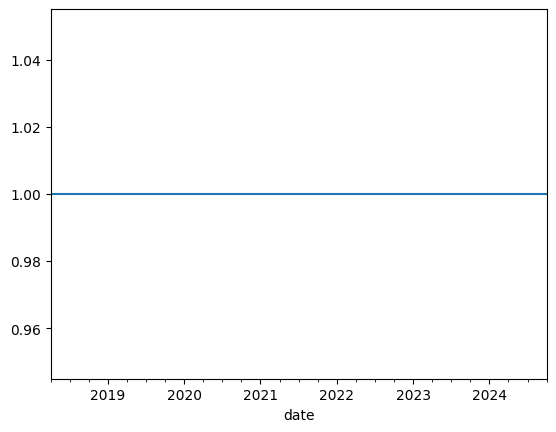

In [614]:
A.sort_values(by='date').groupby(['date'])['Wt'].sum().round(1).plot()

In [615]:
A.head()

,date,BB Symbol,Stock Name,Strat,factor_quantile,Wt
0,2018-04-01,AL IN Equity,Ashok Leyland Ltd.,Cons,Cons,0.03333333
29,2018-04-01,WPRO IN Equity,WIPRO Ltd.,Cons,Cons,0.03333333
28,2018-04-01,VOLT IN Equity,Voltas Ltd.,Cons,Cons,0.03333333
27,2018-04-01,TVSL IN Equity,TVS Motor Company Ltd.,Cons,Cons,0.03333333
26,2018-04-01,TTCH IN Equity,Tata Chemicals Ltd,Cons,Cons,0.03333333


In [616]:
daily_returns_df.head()

,date,BB Symbol,return
0,2017-01-03,ACC IN Equity,-0.61764923
1,2017-01-03,ACEM IN Equity,0.27958993
2,2017-01-03,ADSEZ IN Equity,0.05478451
3,2017-01-03,AIAE IN Equity,-2.03524730
4,2017-01-03,AJP IN Equity,-1.45324451


In [617]:
import pandas as pd
import time
import warnings
import numpy as np
import bt

def fetch_bt(holdings_df, returns_df, rebal_freq=1):
    # Ensure matplotlib inline plotting for Jupyter Notebooks
    try:
        get_ipython().run_line_magic('matplotlib', 'inline')
    except:
        pass

    # Convert dates to datetime.date
    holdings_df['Date'] = pd.to_datetime(holdings_df['Date']).dt.date
    returns_df['date'] = pd.to_datetime(returns_df['date']).dt.date

    # Set index
    holdings_df.set_index('Date', inplace=True)

    # Pivot returns data based on BB Symbol
    returns_df_pivot = returns_df.pivot_table(columns="BB Symbol", index="date", values='return').fillna(0)

    # Align columns
    missing_ids = set(holdings_df.columns) - set(returns_df_pivot.columns)
    if missing_ids:
        warnings.warn(f"Price data not available for all holdings! Missing returns for {len(missing_ids)} securities")
        holdings_df = holdings_df.drop(columns=missing_ids)

    returns_df_pivot = returns_df_pivot[holdings_df.columns]

    # Convert returns to levels
    returns_df_pivot = returns_df_pivot / 100
    levels = (1 + returns_df_pivot).cumprod() * 100

    # Fill missing dates in levels
    for date in holdings_df.index.difference(levels.index):
        levels.loc[date] = np.nan

    levels.sort_index(inplace=True)
    levels.ffill(inplace=True)

    # Determine rebalancing dates
    all_dates = levels.index.tolist()
    rebal_dates = holdings_df.index.tolist()[::rebal_freq]
    all_dates = all_dates[all_dates.index(min(rebal_dates)):]

    aum = [100]
    shares_df = pd.DataFrame()

    # Calculate AUM over time with rebalancing
    for dt in all_dates:
        if dt == min(all_dates):
            shares = aum[0] * holdings_df.loc[dt] / levels.loc[dt]
            shares_df = pd.concat([shares_df, shares], ignore_index=True)
        elif dt in rebal_dates:
            aum.append((shares * levels.loc[dt]).sum())
            shares = aum[-1] * holdings_df.loc[dt] / levels.loc[dt]
            shares_df = pd.concat([shares_df, shares], ignore_index=True)
        else:
            aum.append((shares * levels.loc[dt]).sum())

    aum_df = pd.DataFrame(zip(all_dates, aum), columns=['Date', 'AUM'])
    aum_df['Date'] = pd.to_datetime(aum_df['Date'])
    aum_df.set_index('Date', inplace=True)

    # Define and run the backtest strategy
    strat = bt.Strategy('aum', [bt.algos.RunDaily(), bt.algos.SelectAll(), bt.algos.WeighEqually(), bt.algos.Rebalance()])
    port = bt.Backtest(strat, aum_df)
    res = bt.run(port)

    return aum_df, res

def process_holdings(holdings, daily_return_df):
    levels_df, res = fetch_bt(holdings, daily_return_df)
    return levels_df, res


In [618]:
#Define the local path
import os
local_path = "C:/Users/YourUsername/OneDrive - True Beacon/Amit_data/Projects/Scenario analysis"

In [619]:
levels_files = os.path.join(local_path, "Portfolio")
holdings_main = A.copy()
holdings_main.rename(inplace=True, columns={'date': 'Date'})
all_levels_df = {}
all_res = {}
unique_identifiers = ['Cons']  # Assuming these are the unique identifiers you use

# Process each identifier
for iden in unique_identifiers:
    print(iden)
    returns_file = levels_files + str(iden) + '.csv'

    if iden == 'Mkt_cap':
        holdings = holdings_main.pivot_table(index='Date', columns='BB Symbol', values='Wt_bmk', aggfunc='sum')
    else:
        holdings = holdings_main.loc[holdings_main.factor_quantile == iden].pivot_table(index='Date', columns='BB Symbol', values='Wt', aggfunc='sum')

    holdings = holdings.fillna(0)
    holdings = holdings.reset_index()

    levels_df, res = process_holdings(holdings, daily_returns_df)
    all_levels_df[iden] = levels_df
    all_res[iden] = res

all_levels_df

Cons


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.20s/it]


{'Cons':                     AUM
 Date                   
 2018-04-01 100.00000000
 2018-04-02 101.63609003
 2018-04-03 102.42067986
 2018-04-04 101.42551889
 2018-04-05 103.22617681
 ...                 ...
 2024-11-05 447.97779687
 2024-11-06 455.60495242
 2024-11-07 449.70818132
 2024-11-08 442.70721938
 2024-11-11 442.82632715
 
 [1734 rows x 1 columns]}

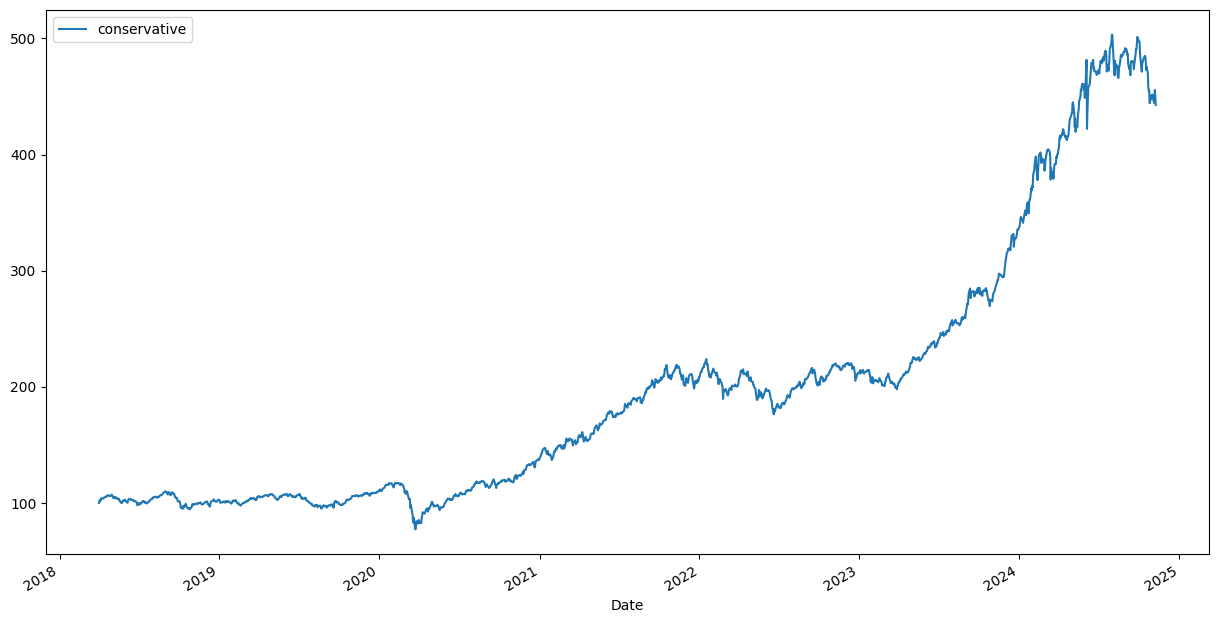

In [620]:
# Convert the dictionary values to a DataFrame and concatenate along the columns (axis=1)
concatenated_df = pd.concat(all_levels_df.values(), axis=1)

# Group the concatenated DataFrame by its index and sum the values along the rows within each group
combined_df = concatenated_df.groupby(concatenated_df.index).sum()

# Reset the index, rename the index column, and set the 'Date' column as index
combined_df = combined_df.reset_index().rename(columns={0:'Date'}).set_index('Date')


combined_df.columns = ['conservative']


# Join with bmk_levels (assuming it's defined) and plot the DataFrame
final_df = combined_df.copy()
final_df[:'2024-11-08'].plot(figsize=(15, 8))
plt.show()

In [621]:
final_df[:'2024-11-08'].calc_stats().display()

Stat                 conservative
-------------------  --------------
Start                2018-04-01
End                  2024-11-08
Risk-free rate       0.00%

Total Return         342.71%
Daily Sharpe         1.28
Daily Sortino        1.87
CAGR                 25.26%
Max Drawdown         -34.07%
Calmar Ratio         0.74

MTD                  -1.13%
3m                   -6.75%
6m                   2.70%
YTD                  32.12%
1Y                   54.89%
3Y (ann.)            26.69%
5Y (ann.)            33.00%
10Y (ann.)           -
Since Incep. (ann.)  25.26%

Daily Sharpe         1.28
Daily Sortino        1.87
Daily Mean (ann.)    23.33%
Daily Vol (ann.)     18.18%
Daily Skew           -1.75
Daily Kurt           16.86
Best Day             6.26%
Worst Day            -12.35%

Monthly Sharpe       1.21
Monthly Sortino      2.17
Monthly Mean (ann.)  23.71%
Monthly Vol (ann.)   19.66%
Monthly Skew         -0.77
Monthly Kurt         3.22
Best Month           18.22%
Worst Month       

In [591]:
#A.to_csv('qtr_cash_portfolio.csv')

In [592]:
#final_df[:'2024-11-08'].to_csv('levels_12mom_ra_6decile.csv')  #this backest of og port
#final_df[:'2024-11-08'].to_csv('levels_12mom_6decile.csv')

In [622]:
final_df[:'2024-11-08'].to_csv('levels_cons_port_24.csv')

In [381]:
# results

In [12]:
lev = pd.read_csv("all_levels.csv")

In [14]:
#lev.fillna(method='ffill', inplace=True)

In [15]:
lev['Date'] = pd.to_datetime(lev['Date'], dayfirst=True) #, errors='coerce')

In [17]:
# Add a new column for the day of the week
lev['Day'] = lev['Date'].dt.day_name()

In [19]:
# Filter out rows that fall on Saturday and Sunday
lev = lev[~lev['Day'].isin(['Saturday', 'Sunday'])]

In [21]:
lev = lev.drop(columns=['Day'])

In [22]:
lev.sort_values(by='Date',inplace=True)
lev.fillna(method='ffill', inplace=True)

C:\Users\Amit Kesarkar\AppData\Local\Temp\ipykernel_7432\615104552.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lev.fillna(method='ffill', inplace=True)


In [23]:
# Set 'date' column as the index
lev.set_index('Date', inplace=True)

In [24]:
lev = lev.rebase(100)

In [25]:
lev.head()

,Nifty 500,Conservative,6mom_4decile,6mom_5decile,6mom_6decile,6mom_ra_4decile,6mom_ra_5decile,6mom_ra_6decile,9mom_4decile,9mom_5decile,9mom_6decile,9mom_ra_4decile,9mom_ra_5decile,9mom_ra_6decile,12mom_4decile,12mom_5decile,12mom_6decile,12mom_ra_4decile,12mom_ra_5decile,12mom_ra_6decile
Date,,,,,,,,,,,,,,,,,,,,
2018-04-02,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000,100.00000000
2018-04-03,100.56795514,100.76741440,100.77195994,100.77195994,100.77195994,100.77195994,100.77195994,100.77195994,100.77195994,100.76741440,100.76741440,100.76741440,100.76741440,100.76741440,100.77195994,100.77195994,100.77195994,100.77195994,100.77195994,100.77195994
2018-04-04,99.46806153,99.79338843,99.79281857,99.79281857,99.79281857,99.79281857,99.79281857,99.79281857,99.79281857,99.79338843,99.79338843,99.79338843,99.79338843,99.79338843,99.79281857,99.79281857,99.79281857,99.79281857,99.79281857,99.79281857
2018-04-05,101.35810541,101.56434475,101.56449033,101.56449033,101.56449033,101.56449033,101.56449033,101.56449033,101.56449033,101.56434475,101.56434475,101.56434475,101.56434475,101.56434475,101.56449033,101.56449033,101.56449033,101.56449033,101.56449033,101.56449033
2018-04-06,101.64513055,102.24321133,102.24725794,102.24725794,102.24725794,102.24725794,102.24725794,102.24725794,102.24725794,102.24321133,102.24321133,102.24321133,102.24321133,102.24321133,102.24725794,102.24725794,102.24725794,102.24725794,102.24725794,102.24725794


In [26]:
lev.tail()

,Nifty 500,Conservative,6mom_4decile,6mom_5decile,6mom_6decile,6mom_ra_4decile,6mom_ra_5decile,6mom_ra_6decile,9mom_4decile,9mom_5decile,9mom_6decile,9mom_ra_4decile,9mom_ra_5decile,9mom_ra_6decile,12mom_4decile,12mom_5decile,12mom_6decile,12mom_ra_4decile,12mom_ra_5decile,12mom_ra_6decile
Date,,,,,,,,,,,,,,,,,,,,
2024-11-04,249.54896050,437.36717828,274.17145416,311.10696683,350.88169616,269.82771543,321.06852802,327.03837426,305.22854825,335.41912633,347.22550177,312.88862652,351.98740653,356.84769776,347.95978997,393.84921842,425.91400102,370.92798985,402.49478861,437.36093842
2024-11-05,251.33926592,440.75167257,274.17016416,311.42975522,352.47599303,269.91004150,321.16648791,328.38608362,306.28791741,336.81621409,349.12436049,313.71507281,353.58126722,359.05155451,349.02875199,395.50986151,428.86282215,372.85039881,404.83825057,439.75672579
2024-11-06,255.23294472,448.24872098,274.61892778,312.58942045,355.12953627,270.39118526,321.73900177,330.52993007,308.48169563,340.50570641,353.22707595,315.48602912,356.38528139,363.42975207,353.57513793,401.24901233,436.05150759,377.04589630,409.97593670,446.30443704
2024-11-07,252.74003724,442.45375836,273.21916487,310.46344758,351.50872500,268.54670551,319.54425175,327.04564294,306.32565863,337.76072412,349.42935852,312.80991736,353.61078316,359.34671389,350.83369982,396.37493739,430.76756052,372.59362073,405.11672114,440.62629485
2024-11-08,250.96025976,435.56670602,272.65192728,309.09319278,349.80436546,267.81295532,318.67116100,325.54299029,304.20529528,334.90751673,345.98583235,310.84218811,351.07241244,355.99173554,347.23026024,391.02907343,423.86777640,369.32516727,400.48444426,434.14044076


In [27]:
def back_test_plot(df):
    
    df.plot(figsize=(19,12))
    plt.show()
    
   
    

    
#def return_fig(df):
    
    #stat = pd.DataFrame()
#    stat = df[['q_1','q_2','q_3','q_4','q_5','Eqwt_universe_wscores']].calc_stats()
    
#    return stat



def return_fig(df):
    c_list = df.columns
    if 'univ' in c_list:
        df = df.drop(['univ'],axis=1)
        stat = df.calc_stats()
    
    else:
        
        stat = df.calc_stats()
    
    return stat


# def risk_adjusted_r(df):
    
#     stat = return_fig(df)
    
#     df_r=(stat.stats.loc[["cagr",'daily_vol','max_drawdown']]*100).T
#     df_r['risk_adjusted_return']=df_r.cagr/df_r.daily_vol
    
#     return df_r.T

def risk_adjusted_r(df):
    
    stat = return_fig(df)
    
    df_r=(stat.stats.loc[["total_return","cagr",'daily_vol','max_drawdown']]*100).T
    df_r['return per unit risk']=df_r.cagr/df_r.daily_vol
    
    return df_r.T

def long_short(df_levels):
    
    l_S = df_levels[['q_1','q_5']].pct_change().fillna(0)
    l_S['ls']= l_S.q_5-l_S.q_1
    l_S['ls_cumprod'] = (1 + l_S['ls']).cumprod()
    # long-short
    #px.line(l_S.ls_cumprod.rebase(100))
    
    return l_S.ls_cumprod.rebase(100)

In [30]:
risk_adjusted_r(lev.rebase(100)).T

,total_return,cagr,daily_vol,max_drawdown,return per unit risk
Nifty 500,150.96025976,14.95088455,17.05918807,-38.30235109,0.87641243
Conservative,335.56670602,24.96036126,18.21487464,-34.07173895,1.37032847
6mom_4decile,172.65192728,16.40304943,9.33111824,-10.62369405,1.75788678
6mom_5decile,209.09319278,18.63543163,11.29754246,-15.10377358,1.64951198
6mom_6decile,249.80436546,20.87921840,13.41051743,-21.86504791,1.55692862
6mom_ra_4decile,167.81295532,16.08782795,9.39420507,-13.61739601,1.71252680
6mom_ra_5decile,218.67116100,19.18493661,11.42404717,-16.01456582,1.67934676
6mom_ra_6decile,225.54299029,19.57061437,13.19243682,-20.94582063,1.48347228
9mom_4decile,204.20529528,18.34941408,10.61401864,-14.00289089,1.72879045
9mom_5decile,234.90751673,20.08522045,12.64406918,-17.38232865,1.58850922


In [58]:
risk_adjusted_r(lev['2024-10-01':'2024-10-31'].rebase(100)).T

,total_return,cagr,daily_vol,max_drawdown,return per unit risk
Nifty 500,-6.51778026,-55.98245954,14.14980688,-7.30183385,-3.95641156
Conservative,-9.97205412,-72.16801839,18.72377223,-10.69583224,-3.85435250
6mom_4decile,-3.88296938,-38.25607887,7.89552207,-3.88296938,-4.84528807
6mom_5decile,-5.15057116,-47.47117136,9.57854657,-5.23474429,-4.95598899
6mom_6decile,-5.88456907,-52.21180056,12.23274809,-6.04249895,-4.26819879
6mom_ra_4decile,-4.00868364,-39.23213775,7.19567950,-4.00868364,-5.45217971
6mom_ra_5decile,-4.51531097,-43.02382888,7.94494064,-4.52631609,-5.41524863
6mom_ra_6decile,-5.82925119,-51.86870030,10.94985026,-5.83621025,-4.73693238
9mom_4decile,-6.39875005,-55.29520901,11.83693371,-6.50327103,-4.67141325
9mom_5decile,-8.49697683,-66.07838521,15.11270090,-8.58526406,-4.37237431


In [31]:

# Function to calculate quarterly statistics
def calculate_quarterly_stats(data, start_date, end_date):
    quarters = pd.date_range(start=start_date, end=end_date, freq='3MS')  # Quarterly start dates
    results = []

    for i in range(len(quarters) - 1):
        start = quarters[i]
        end = quarters[i + 1] - pd.Timedelta(days=1)

        # Filter data for the quarter
        quarter_data = data[start:end]

        # Calculate metrics
        total_return = (quarter_data.iloc[-1] / quarter_data.iloc[0] - 1) * 100
        max_drawdown = (
            (quarter_data / quarter_data.cummax() - 1).min() * 100
        )  # Percentage drawdown
        
        # Format the results
        quarter_label = f"{end.strftime('%b-%y')}"
        results.append({"Quarter": quarter_label, "Metric": "Total Return", **total_return})
        results.append({"Quarter": quarter_label, "Metric": "Max Drawdown", **max_drawdown})

    return pd.DataFrame(results)


# Display the DataFrame
#import ace_tools as tools; tools.display_dataframe_to_user(name="Quarterly Statistics", dataframe=formatted_df)


In [37]:
# Assuming 'lev' is a DataFrame with your data
# Set start and end dates for the analysis
start_date = '2018-04-01'
end_date = '2025-01-01'

# Compute the quarterly statistics
quarterly_stats = calculate_quarterly_stats(lev, start_date, end_date)

# Reshape the results to the desired format
formatted_df = (
    quarterly_stats
    .melt(id_vars=["Quarter", "Metric"], var_name="Portfolio", value_name="Value")
    .pivot(index=["Quarter", "Metric"], columns="Portfolio", values="Value")
    .reset_index()
)

# Ensure quarters are ordered correctly
formatted_df['Quarter'] = pd.Categorical(formatted_df['Quarter'], categories=formatted_df['Quarter'].unique(), ordered=True)
formatted_df = formatted_df.sort_values(['Quarter', 'Metric'])


# Save to a CSV file (optional)
#formatted_df.to_csv("quarterly_stats.csv")

In [39]:
formatted_df

Portfolio,Quarter,Metric,12mom_4decile,12mom_5decile,12mom_6decile,12mom_ra_4decile,12mom_ra_5decile,12mom_ra_6decile,6mom_4decile,6mom_5decile,...,6mom_ra_5decile,6mom_ra_6decile,9mom_4decile,9mom_5decile,9mom_6decile,9mom_ra_4decile,9mom_ra_5decile,9mom_ra_6decile,Conservative,Nifty 500
0,Dec-18,Max Drawdown,-6.11256138,-5.92955794,-6.31731641,-6.11256143,-5.92955794,-6.31731646,-5.15055778,-5.91858878,...,-5.91832994,-6.55967905,-5.30493103,-5.75479566,-6.51049292,-5.20710059,-5.63745943,-6.34843001,-6.81773399,-8.16376630
1,Dec-18,Total Return,-0.04895365,1.03107677,1.34441871,-0.04895362,1.05088773,1.36473564,-2.54751468,-1.31869644,...,-1.46680462,-0.91446266,0.01339460,0.23167454,0.93704246,-0.40964952,1.12192860,0.91949526,1.35960591,0.04909716
2,Dec-19,Max Drawdown,-0.94258142,-1.06195612,-1.41345973,-0.94258133,-1.06195609,-1.37080294,-0.64984954,-0.84387109,...,-0.84387116,-0.91287667,-1.00774499,-0.95736194,-1.48120718,-0.98983650,-0.98264873,-1.47484365,-2.38117128,-2.77970567
3,Dec-19,Total Return,6.52244004,9.23403990,9.09863934,6.41899295,9.26093029,9.09934735,5.01455911,5.11259045,...,5.41325243,6.28605462,5.90221568,6.73642904,8.00119272,5.75858250,6.64866375,7.86708037,10.99666768,6.88742367
4,Dec-20,Max Drawdown,-2.61932963,-2.66347629,-2.76344187,-2.65876829,-2.66347632,-2.76344185,-2.04754922,-2.09931999,...,-2.02712458,-2.21688553,-2.59947857,-2.78019114,-2.77500958,-2.60420255,-2.73469953,-2.77049794,-3.40261854,-3.44121532
5,Dec-20,Total Return,9.75071455,13.16839628,13.76560755,9.68715930,13.16839742,13.76560753,6.86436054,7.46919691,...,9.67498916,9.96214648,8.82642989,10.25302377,11.36182427,8.55878364,10.58162971,11.43991901,16.61138045,21.73605166
6,Dec-21,Max Drawdown,-3.65376536,-4.40475328,-6.40144326,-4.16642810,-5.63518275,-7.35317100,-2.81190884,-3.51048342,...,-4.83276538,-5.49922481,-3.55432113,-4.16121189,-6.17098886,-3.69000097,-5.95425502,-6.63691054,-9.28320161,-9.98007699
7,Dec-21,Total Return,3.81814387,3.94693630,2.86802200,4.16052859,3.77866216,3.46765317,3.15301733,3.04806237,...,3.47175299,3.19195052,3.83298498,4.13891767,3.81797765,4.02043423,4.08840874,3.89657684,1.92910302,-0.11822339
8,Dec-22,Max Drawdown,-4.86958224,-5.40573032,-5.74169271,-4.70925603,-5.53639399,-5.51206840,-3.11239767,-3.53810688,...,-3.67144489,-4.02600177,-3.69174712,-4.83898967,-4.86736088,-3.99307927,-4.81611208,-4.86944572,-6.98254364,-5.98570978
9,Dec-22,Total Return,3.77032794,4.04793016,4.81038181,3.72890697,3.94375897,4.36887184,2.72311738,4.42211314,...,4.27777179,4.52495602,3.73443339,3.83864671,4.60085314,3.48174619,3.85372714,4.64806125,4.96728138,5.53574478


In [40]:
formatted_df.to_csv("quarterly_stats.csv")

In [47]:
import pandas as pd

# Function to calculate monthly statistics
def calculate_monthly_stats(data, start_date, end_date):
    months = pd.date_range(start=start_date, end=end_date, freq='MS')  # Monthly start dates
    results = []

    for i in range(len(months) - 1):
        start = months[i]
        end = months[i + 1] - pd.Timedelta(days=1)

        # Filter data for the month
        month_data = data[start:end]

        # Skip if no data in the month
        if month_data.empty:
            continue

        # Calculate metrics
        total_return = (month_data.iloc[-1] / month_data.iloc[0] - 1) * 100
        max_drawdown = (
            (month_data / month_data.cummax() - 1).min() * 100
        )  # Percentage drawdown

        # Format the results
        month_label = f"{start.strftime('%b-%y')}"
        results.append({"Month": month_label, "Metric": "Total Return", **total_return})
        results.append({"Month": month_label, "Metric": "Max Drawdown", **max_drawdown})

    return pd.DataFrame(results)




In [54]:
# Example Usage
start_date = '2018-04-01'
end_date = '2025-01-01'

# Compute the monthly statistics
monthly_stats = calculate_monthly_stats(lev, start_date, end_date)

# Reshape the results to the desired format
formatted_monthly_df = (
    monthly_stats
    .melt(id_vars=["Month", "Metric"], var_name="Portfolio", value_name="Value")
    .pivot(index=["Month", "Metric"], columns="Portfolio", values="Value")
    .reset_index()
)

# Ensure months are ordered correctly
formatted_monthly_df['Month'] = pd.Categorical(formatted_monthly_df['Month'], categories=formatted_monthly_df['Month'].unique(), ordered=True)
formatted_monthly_df = formatted_monthly_df.sort_values(['Month', 'Metric'])

# Display the formatted DataFrame
#print(formatted_monthly_df)

In [55]:
formatted_monthly_df.tail(30)

Portfolio,Month,Metric,12mom_4decile,12mom_5decile,12mom_6decile,12mom_ra_4decile,12mom_ra_5decile,12mom_ra_6decile,6mom_4decile,6mom_5decile,...,6mom_ra_5decile,6mom_ra_6decile,9mom_4decile,9mom_5decile,9mom_6decile,9mom_ra_4decile,9mom_ra_5decile,9mom_ra_6decile,Conservative,Nifty 500
130,Nov-24,Max Drawdown,-1.79449204,-2.54703154,-2.79410367,-2.04768945,-2.31513403,-2.72549302,-0.71626545,-1.11847281,...,-0.95351846,-1.50877101,-1.38627361,-1.64408102,-2.05002507,-1.47196407,-1.49076554,-2.04661740,-2.82923617,-1.67403349
131,Nov-24,Total Return,-1.25424325,-2.07164616,-1.97818515,-1.52036793,-1.66734507,-2.13272675,-0.44928367,-0.92842079,...,-0.83533947,-1.04009444,-0.91838799,-0.91978112,-1.24684078,-1.11114589,-0.80340265,-1.19333697,-1.95335858,-0.77945806
132,Oct-18,Max Drawdown,-6.11256138,-5.92955794,-6.31731641,-6.11256143,-5.92955794,-6.31731646,-5.15055778,-5.91858878,...,-5.91832994,-6.55967905,-5.30493103,-5.75479566,-6.51049292,-5.20710059,-5.63745943,-6.34843001,-6.81773399,-8.16376630
133,Oct-18,Total Return,-2.92565728,-2.35423811,-2.61413058,-2.92565736,-2.31702164,-2.61413064,-2.39762956,-2.87189122,...,-2.94063232,-3.19278751,-2.15707637,-2.06653693,-2.72327965,-2.33045061,-2.18822439,-2.58241221,-2.69950739,-4.49566308
134,Oct-19,Max Drawdown,-0.56521446,-0.50292792,-0.61939722,-0.53150736,-0.49051488,-0.61939724,-0.48053100,-0.48052485,...,-0.51233776,-0.80730247,-0.48629769,-0.55124731,-0.49696849,-0.51532162,-0.58664680,-0.51045941,-0.77754216,-2.11933221
135,Oct-19,Total Return,4.88121221,5.96491484,6.30521484,5.01122144,5.99100043,6.39070192,3.04582843,3.44789685,...,3.57683326,4.30769526,3.93662877,5.21349154,5.99344002,3.64525655,4.87941149,5.86527875,6.96758558,4.90721493
136,Oct-20,Max Drawdown,-1.87235037,-1.57675393,-1.73315628,-1.67313270,-1.57675393,-1.73315628,-1.57237379,-1.59078631,...,-1.54987557,-1.56996379,-1.76048345,-1.55676411,-1.55945419,-1.81729223,-1.55579021,-1.55369383,-2.20697636,-2.18520188
137,Oct-20,Total Return,0.81133606,1.09109455,1.06790368,0.84808696,1.09109558,1.06790370,1.47008371,1.18238065,...,1.44819360,1.43307052,0.78077790,0.66036424,0.66177643,0.67813548,0.66225166,0.66194222,0.80802926,1.26774258
138,Oct-21,Max Drawdown,-3.15413323,-3.64594085,-4.79806427,-3.26909672,-4.16901115,-4.64348923,-2.17865915,-2.53347172,...,-2.45485986,-3.14082859,-3.55432113,-3.98354217,-3.82320218,-3.69000097,-4.00996615,-3.78415569,-5.59568437,-5.03111201
139,Oct-21,Total Return,1.68898096,2.00397749,1.46159250,2.35562206,1.77087481,1.94000155,1.59546516,1.60878100,...,2.42842068,2.17509894,1.60601028,1.81540131,2.28864767,1.87994891,2.28455325,2.36707939,1.62064238,0.48588146


In [56]:
formatted_monthly_df.to_csv("monthly_stats.csv")